In [1]:
import os
import sys
import pandas as pd

# Setting up local details:
# This should be the location of the checkout of the FS-Mol repository:
FS_MOL_CHECKOUT_PATH = os.path.join("/data/local/apps/", "Meta-Learning", "FS-Mol")
FS_MOL_DATASET_PATH = os.path.join("/data/local/apps/", "Meta-Learning", "FS-Mol", "datasets")

os.chdir(FS_MOL_CHECKOUT_PATH)
sys.path.insert(0, FS_MOL_CHECKOUT_PATH)

from fs_mol.plotting.utils import (
    highlight_max_all, 
    plot_all_assays, 
    load_data,
    expand_values,
    plot_task_performances_by_id,
    box_plot,
    plot_by_size,
    get_aggregates_across_sizes
)

In [2]:
#evaluation_output_directory = os.path.join(FS_MOL_CHECKOUT_PATH, "outputs", "FSMol_Eval_kNN_2023-03-14_16-14-42")
#model_name = "kNN"

evaluation_output_directory = os.path.join(FS_MOL_CHECKOUT_PATH, "outputs", "FSMol_Eval_ProtoNet_2023-03-20_15-28-16")
model_name = "ProtoNet"
! python fs_mol/plotting/collect_eval_runs.py {model_name} {evaluation_output_directory} --plot

processing /data/local/apps/Meta-Learning/FS-Mol/outputs/FSMol_Eval_ProtoNet_2023-03-20_15-28-16/CHEMBL1A2_eval_results.csv
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the f

In [2]:
# Configure this to contain all the models that you want to look at.
# Dict keys are human readable names, values are the path to the summary produced by collect_eval_runs.py
results_path = os.path.join(FS_MOL_CHECKOUT_PATH, "outputs")

# a dictionary summarising all models to be compared. Add new paths here as desired.
model_summaries = {
    "kNN": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-14_16-14-42", "summary", "kNN_summary.csv"),
    "kNN_similar": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_13-58-30", "summary", "kNN_summary.csv"),
    "kNN_dissimilar": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_14-17-21", "summary", "kNN_summary.csv"),
    "ProtoNet": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-15_00-08-24", "summary", "ProtoNet_summary.csv"),
    "ProtoNet_similar": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_14-46-38", "summary", "ProtoNet_summary.csv"),
    "ProtoNet_dissimilar": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_15-28-16", "summary", "ProtoNet_summary.csv"),
}
# Generated plots will be stored here, if you want to keep them. None disables saving.
plot_output_dir = os.path.join(results_path, "plots")
all_tasks_output_dir = os.path.join(results_path, "plots/all_tasks")
os.makedirs(plot_output_dir, exist_ok=True)
os.makedirs(all_tasks_output_dir, exist_ok=True)

In [3]:
data = load_data(model_summaries)

Loading data for kNN from /data/local/apps/Meta-Learning/FS-Mol/outputs/FSMol_Eval_kNN_2023-03-14_16-14-42/summary/kNN_summary.csv.
Loading data for kNN_similar from /data/local/apps/Meta-Learning/FS-Mol/outputs/FSMol_Eval_kNN_2023-03-20_13-58-30/summary/kNN_summary.csv.
Loading data for kNN_dissimilar from /data/local/apps/Meta-Learning/FS-Mol/outputs/FSMol_Eval_kNN_2023-03-20_14-17-21/summary/kNN_summary.csv.
Loading data for ProtoNet from /data/local/apps/Meta-Learning/FS-Mol/outputs/FSMol_Eval_ProtoNet_2023-03-15_00-08-24/summary/ProtoNet_summary.csv.
Loading data for ProtoNet_similar from /data/local/apps/Meta-Learning/FS-Mol/outputs/FSMol_Eval_ProtoNet_2023-03-20_14-46-38/summary/ProtoNet_summary.csv.
Loading data for ProtoNet_dissimilar from /data/local/apps/Meta-Learning/FS-Mol/outputs/FSMol_Eval_ProtoNet_2023-03-20_15-28-16/summary/ProtoNet_summary.csv.


/data/local/apps/Meta-Learning/FS-Mol/fs_mol/plotting/utils.py:530: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_df.groupby(["TASK_ID"])


In [4]:
# expand out from val +/- error format, and calculate delta AUPRC
data = expand_values(data, model_summaries)

In [5]:
data

,TASK_ID,fraction_positive_train,fraction_positive_test,16_train (kNN),32_train (kNN),64_train (kNN),128_train (kNN),256_train (kNN),16_train (kNN_similar),32_train (kNN_similar),...,128_train (kNN_dissimilar) val delta-auprc,128_train (ProtoNet) val delta-auprc,128_train (ProtoNet_similar) val delta-auprc,128_train (ProtoNet_dissimilar) val delta-auprc,256_train (kNN) val delta-auprc,256_train (kNN_similar) val delta-auprc,256_train (kNN_dissimilar) val delta-auprc,256_train (ProtoNet) val delta-auprc,256_train (ProtoNet_similar) val delta-auprc,256_train (ProtoNet_dissimilar) val delta-auprc
0,1A2,0.453125,0.508127,0.566+/-0.044,0.588+/-0.039,0.609+/-0.03,0.636+/-0.024,0.64+/-0.017,0.763+/-0.232,0.792+/-0.141,...,0.169875,0.211875,0.408875,0.198875,0.186875,0.416875,0.159875,0.255875,0.421875,0.232875
1,2C19,0.412500,0.381815,0.489+/-0.038,0.515+/-0.025,0.53+/-0.02,0.553+/-0.017,0.581+/-0.02,0.608+/-0.234,0.548+/-0.153,...,0.139500,0.197500,0.272500,0.195500,0.168500,0.231500,0.167500,0.218500,0.252500,0.217500
2,2C9,0.303125,0.297496,0.38+/-0.043,0.397+/-0.041,0.411+/-0.031,0.42+/-0.026,0.45+/-0.022,0.541+/-0.281,0.643+/-0.241,...,0.111875,0.224875,0.466875,0.213875,0.146875,0.366875,0.133875,0.250875,0.466875,0.230875
3,2D6,0.187500,0.202949,0.21+/-0.014,0.221+/-0.019,0.24+/-0.019,0.282+/-0.033,0.309+/-0.022,0.469+/-0.213,0.465+/-0.16,...,0.083500,0.207500,0.526500,0.187500,0.121500,0.452500,0.097500,0.253500,0.536500,0.224500
4,3A4,0.368750,0.437969,0.473+/-0.057,0.495+/-0.034,0.523+/-0.019,0.543+/-0.03,0.572+/-0.023,0.697+/-0.192,0.808+/-0.115,...,0.155250,0.217250,0.475250,0.191250,0.203250,0.458250,0.173250,0.234250,0.451250,0.199250


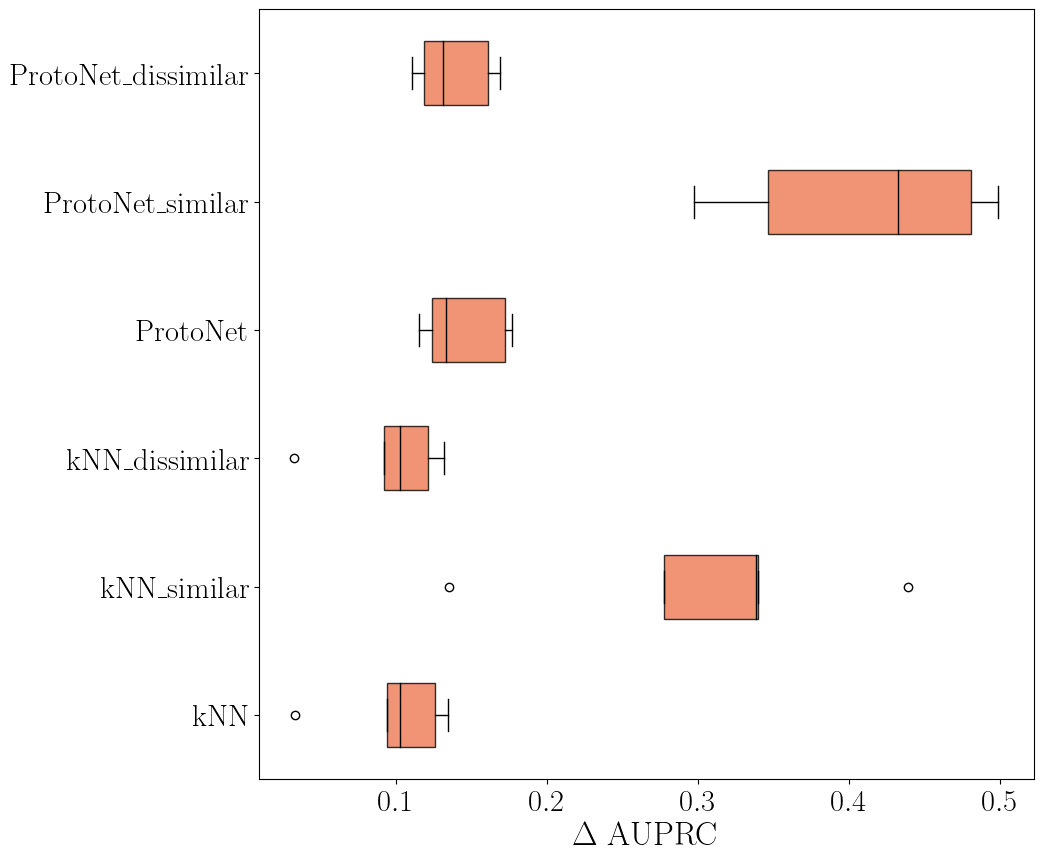

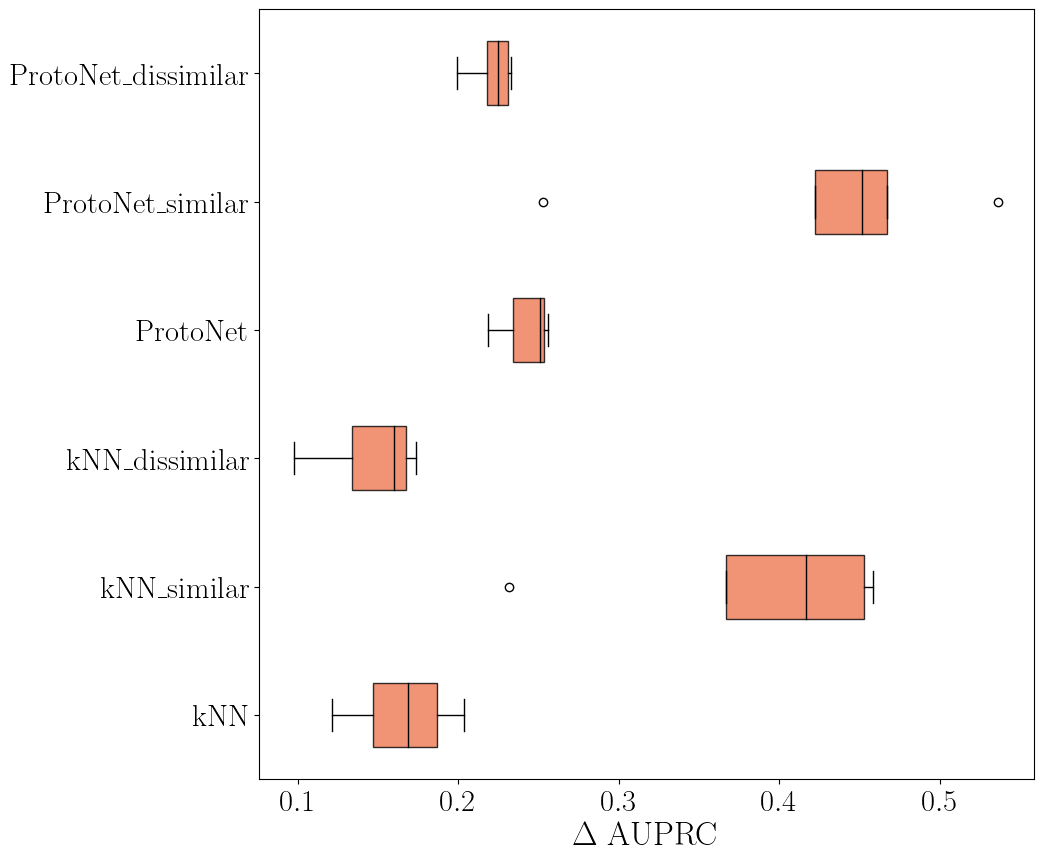

In [6]:
box_plot(data, model_summaries, support_set_size = 32, plot_output_dir=plot_output_dir)
box_plot(data, model_summaries, support_set_size = 256, plot_output_dir=plot_output_dir)

In [7]:
# a dictionary summarising all models to be compared. Add new paths here as desired.
model_summaries_kNN = {
    "kNN_16": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-14_16-14-42", "summary", "kNN_summary_num_train_requested_16.csv"),
    "kNN_32": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-14_16-14-42", "summary", "kNN_summary_num_train_requested_32.csv"),
    "kNN_64": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-14_16-14-42", "summary", "kNN_summary_num_train_requested_64.csv"),
    "kNN_128": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-14_16-14-42", "summary", "kNN_summary_num_train_requested_128.csv"),
    "kNN_256": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-14_16-14-42", "summary", "kNN_summary_num_train_requested_256.csv"),
}

In [8]:
# a dictionary summarising all models to be compared. Add new paths here as desired.
model_summaries_kNN_similar = {
    "kNN_16": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_13-58-30", "summary", "kNN_summary_num_train_requested_16.csv"),
    "kNN_32": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_13-58-30", "summary", "kNN_summary_num_train_requested_32.csv"),
    "kNN_64": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_13-58-30", "summary", "kNN_summary_num_train_requested_64.csv"),
    "kNN_128": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_13-58-30", "summary", "kNN_summary_num_train_requested_128.csv"),
    "kNN_256": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_13-58-30", "summary", "kNN_summary_num_train_requested_256.csv"),
}

In [9]:
model_summaries_kNN_dissimilar = {
    "kNN_16": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_14-17-21", "summary", "kNN_summary_num_train_requested_16.csv"),
    "kNN_32": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_14-17-21", "summary", "kNN_summary_num_train_requested_32.csv"),
    "kNN_64": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_14-17-21", "summary", "kNN_summary_num_train_requested_64.csv"),
    "kNN_128": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_14-17-21", "summary", "kNN_summary_num_train_requested_128.csv"),
    "kNN_256": os.path.join(results_path, "FSMol_Eval_kNN_2023-03-20_14-17-21", "summary", "kNN_summary_num_train_requested_256.csv"),
}

In [10]:
# a dictionary summarising all models to be compared. Add new paths here as desired.
model_summaries_ProtoNet = {
    "ProtoNet_16": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-15_00-08-24", "summary", "ProtoNet_summary_num_train_requested_16.csv"),
    "ProtoNet_32": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-15_00-08-24", "summary", "ProtoNet_summary_num_train_requested_32.csv"),
    "ProtoNet_64": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-15_00-08-24", "summary", "ProtoNet_summary_num_train_requested_64.csv"),
    "ProtoNet_128": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-15_00-08-24", "summary", "ProtoNet_summary_num_train_requested_128.csv"),
    "ProtoNet_256": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-15_00-08-24", "summary", "ProtoNet_summary_num_train_requested_256.csv"),
}

In [11]:
model_summaries_ProtoNet_similar = {
    "ProtoNet_16": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_14-46-38", "summary", "ProtoNet_summary_num_train_requested_16.csv"),
    "ProtoNet_32": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_14-46-38", "summary", "ProtoNet_summary_num_train_requested_32.csv"),
    "ProtoNet_64": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_14-46-38", "summary", "ProtoNet_summary_num_train_requested_64.csv"),
    "ProtoNet_128": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_14-46-38", "summary", "ProtoNet_summary_num_train_requested_128.csv"),
    "ProtoNet_256": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_14-46-38", "summary", "ProtoNet_summary_num_train_requested_256.csv"),
}

In [12]:
model_summaries_ProtoNet_dissimilar = {
    "ProtoNet_16": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_15-28-16", "summary", "ProtoNet_summary_num_train_requested_16.csv"),
    "ProtoNet_32": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_15-28-16", "summary", "ProtoNet_summary_num_train_requested_32.csv"),
    "ProtoNet_64": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_15-28-16", "summary", "ProtoNet_summary_num_train_requested_64.csv"),
    "ProtoNet_128": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_15-28-16", "summary", "ProtoNet_summary_num_train_requested_128.csv"),
    "ProtoNet_256": os.path.join(results_path, "FSMol_Eval_ProtoNet_2023-03-20_15-28-16", "summary", "ProtoNet_summary_num_train_requested_256.csv"),
}

/tmp/ipykernel_96115/1792804331.py:33: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0].errorbar(knn_16['task_id'], knn_16['roc_auc'], knn_16['roc_auc_std'], linestyle='None', fmt='-o',label='knn_16', linewidth=4, markersize=10)
/tmp/ipykernel_96115/1792804331.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[1].errorbar(knn_32['task_id'], knn_32['roc_auc'], knn_32['roc_auc_std'], linestyle='None', fmt='-o',label='knn_32', linewidth=4, markersize=10)
/tmp/ipykernel_96115/1792804331.py:43: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[2].errorbar(knn_64['task_id'], knn_64['roc_auc'], knn_64['roc_auc_std'], 

[[(0.55, 0.8)], [(0.55, 0.8)], [(0.55, 0.8)], [(0.55, 0.8)], [(0.55, 0.8)]]

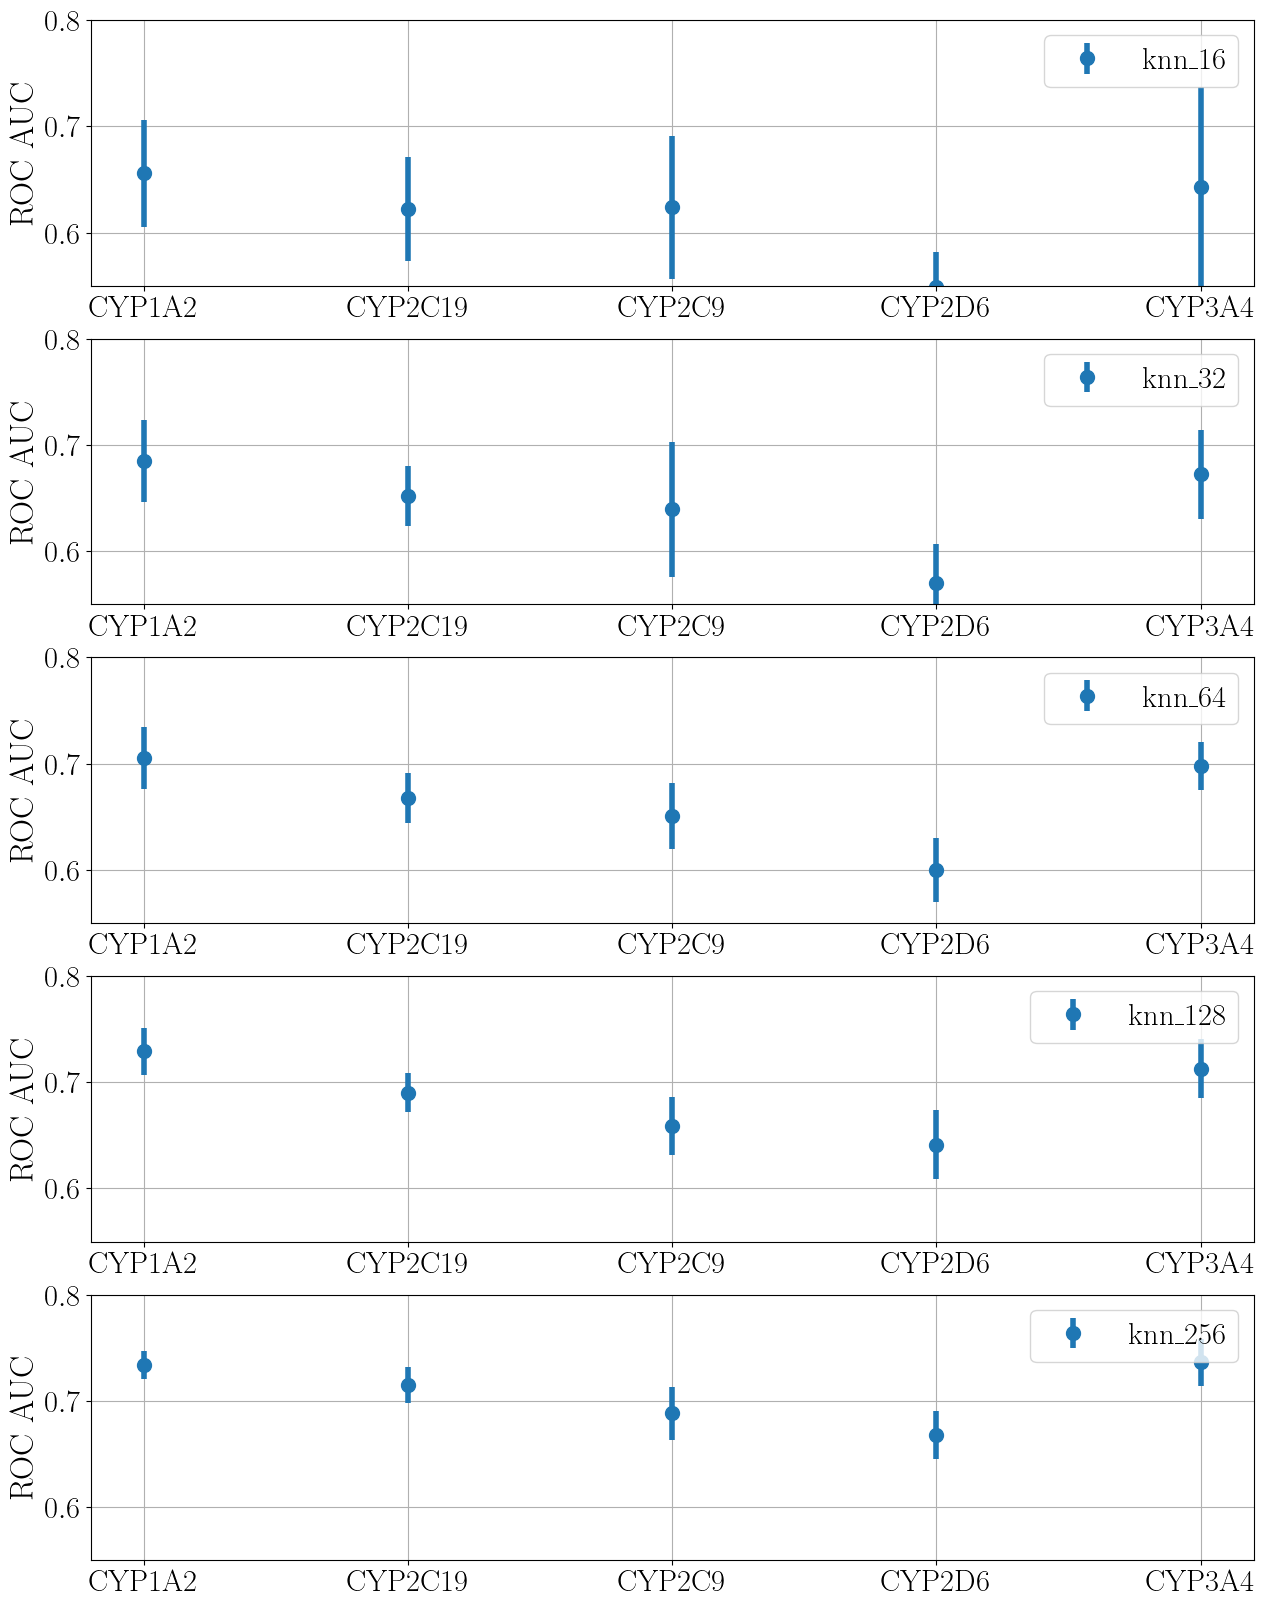

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['CYP1A2', 'CYP2C19', 'CYP2C9', 'CYP2D6', 'CYP3A4']

fig, ax = plt.subplots(5, 1, figsize=(15, 20))

knn_16 = pd.read_csv(model_summaries_kNN['kNN_16'])
knn_16_similar = pd.read_csv(model_summaries_kNN_similar['kNN_16'])
knn_16_dissimilar = pd.read_csv(model_summaries_kNN_dissimilar['kNN_16'])


knn_32 = pd.read_csv(model_summaries_kNN['kNN_32'])
knn_64 = pd.read_csv(model_summaries_kNN['kNN_64'])
knn_128 = pd.read_csv(model_summaries_kNN['kNN_128'])

knn_256 = pd.read_csv(model_summaries_kNN['kNN_256'])
knn_256_similar = pd.read_csv(model_summaries_kNN_similar['kNN_256'])
knn_256_dissimilar = pd.read_csv(model_summaries_kNN_dissimilar['kNN_256'])


knn_16['task_id'] = labels
knn_16_similar['task_id'] = labels
knn_16_dissimilar['task_id'] = labels
knn_32['task_id'] = labels
knn_64['task_id'] = labels
knn_128['task_id'] = labels
knn_256['task_id'] = labels
knn_256_similar['task_id'] = labels
knn_256_dissimilar['task_id'] = labels

ax[0].errorbar(knn_16['task_id'], knn_16['roc_auc'], knn_16['roc_auc_std'], linestyle='None', fmt='-o',label='knn_16', linewidth=4, markersize=10)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('ROC AUC')

ax[1].errorbar(knn_32['task_id'], knn_32['roc_auc'], knn_32['roc_auc_std'], linestyle='None', fmt='-o',label='knn_32', linewidth=4, markersize=10)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('ROC AUC')

ax[2].errorbar(knn_64['task_id'], knn_64['roc_auc'], knn_64['roc_auc_std'], linestyle='None', fmt='-o',label='knn_64', linewidth=4, markersize=10)
ax[2].legend()
ax[2].grid()
ax[2].set_ylabel('ROC AUC')

ax[3].errorbar(knn_128['task_id'], knn_128['roc_auc'], knn_128['roc_auc_std'], linestyle='None', fmt='-o',label='knn_128', linewidth=4, markersize=10)
ax[3].legend()
ax[3].grid()
ax[3].set_ylabel('ROC AUC')

ax[4].errorbar(knn_256['task_id'], knn_256['roc_auc'], knn_256['roc_auc_std'], linestyle='None', fmt='-o',label='knn_256', linewidth=4, markersize=10)
ax[4].legend()
ax[4].grid()
ax[4].set_ylabel('ROC AUC')

[ax[i].set(ylim=(0.55, 0.8)) for i in range(5)]



Text(0, 0.5, 'ROC AUC')

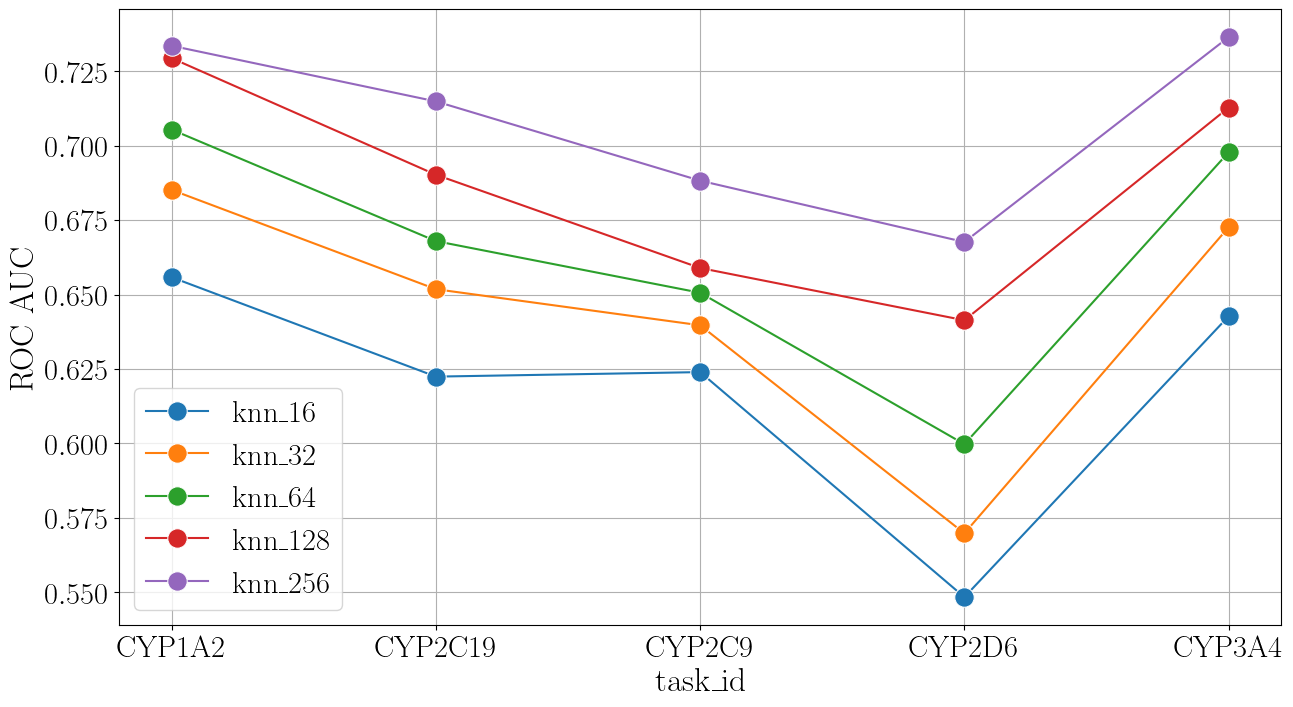

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(knn_16, x= 'task_id', y='roc_auc', label= 'knn_16', marker="o", markersize=14, ax=ax)
sns.lineplot(knn_32, x= 'task_id', y='roc_auc', label= 'knn_32', marker="o", markersize=14, ax=ax)
sns.lineplot(knn_64, x= 'task_id', y='roc_auc', label= 'knn_64', marker="o", markersize=14, ax=ax)
sns.lineplot(knn_128, x= 'task_id', y='roc_auc', label= 'knn_128', marker="o", markersize=14, ax=ax)
sns.lineplot(knn_256, x= 'task_id', y='roc_auc', label= 'knn_256', marker="o", markersize=14, ax=ax)

ax.legend()
ax.grid()
ax.set_ylabel('ROC AUC')

/tmp/ipykernel_96115/2690634663.py:36: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0].errorbar(ProtoNet_32['task_id'], ProtoNet_32['roc_auc'], ProtoNet_32['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_32', linewidth=4, markersize=10)
/tmp/ipykernel_96115/2690634663.py:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[1].errorbar(ProtoNet_64['task_id'], ProtoNet_64['roc_auc'], ProtoNet_64['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_64', linewidth=4, markersize=10)
/tmp/ipykernel_96115/2690634663.py:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[2].errorbar(ProtoNet_128['task_id

[[(0.55, 0.8)], [(0.55, 0.8)], [(0.55, 0.8)], [(0.55, 0.8)]]

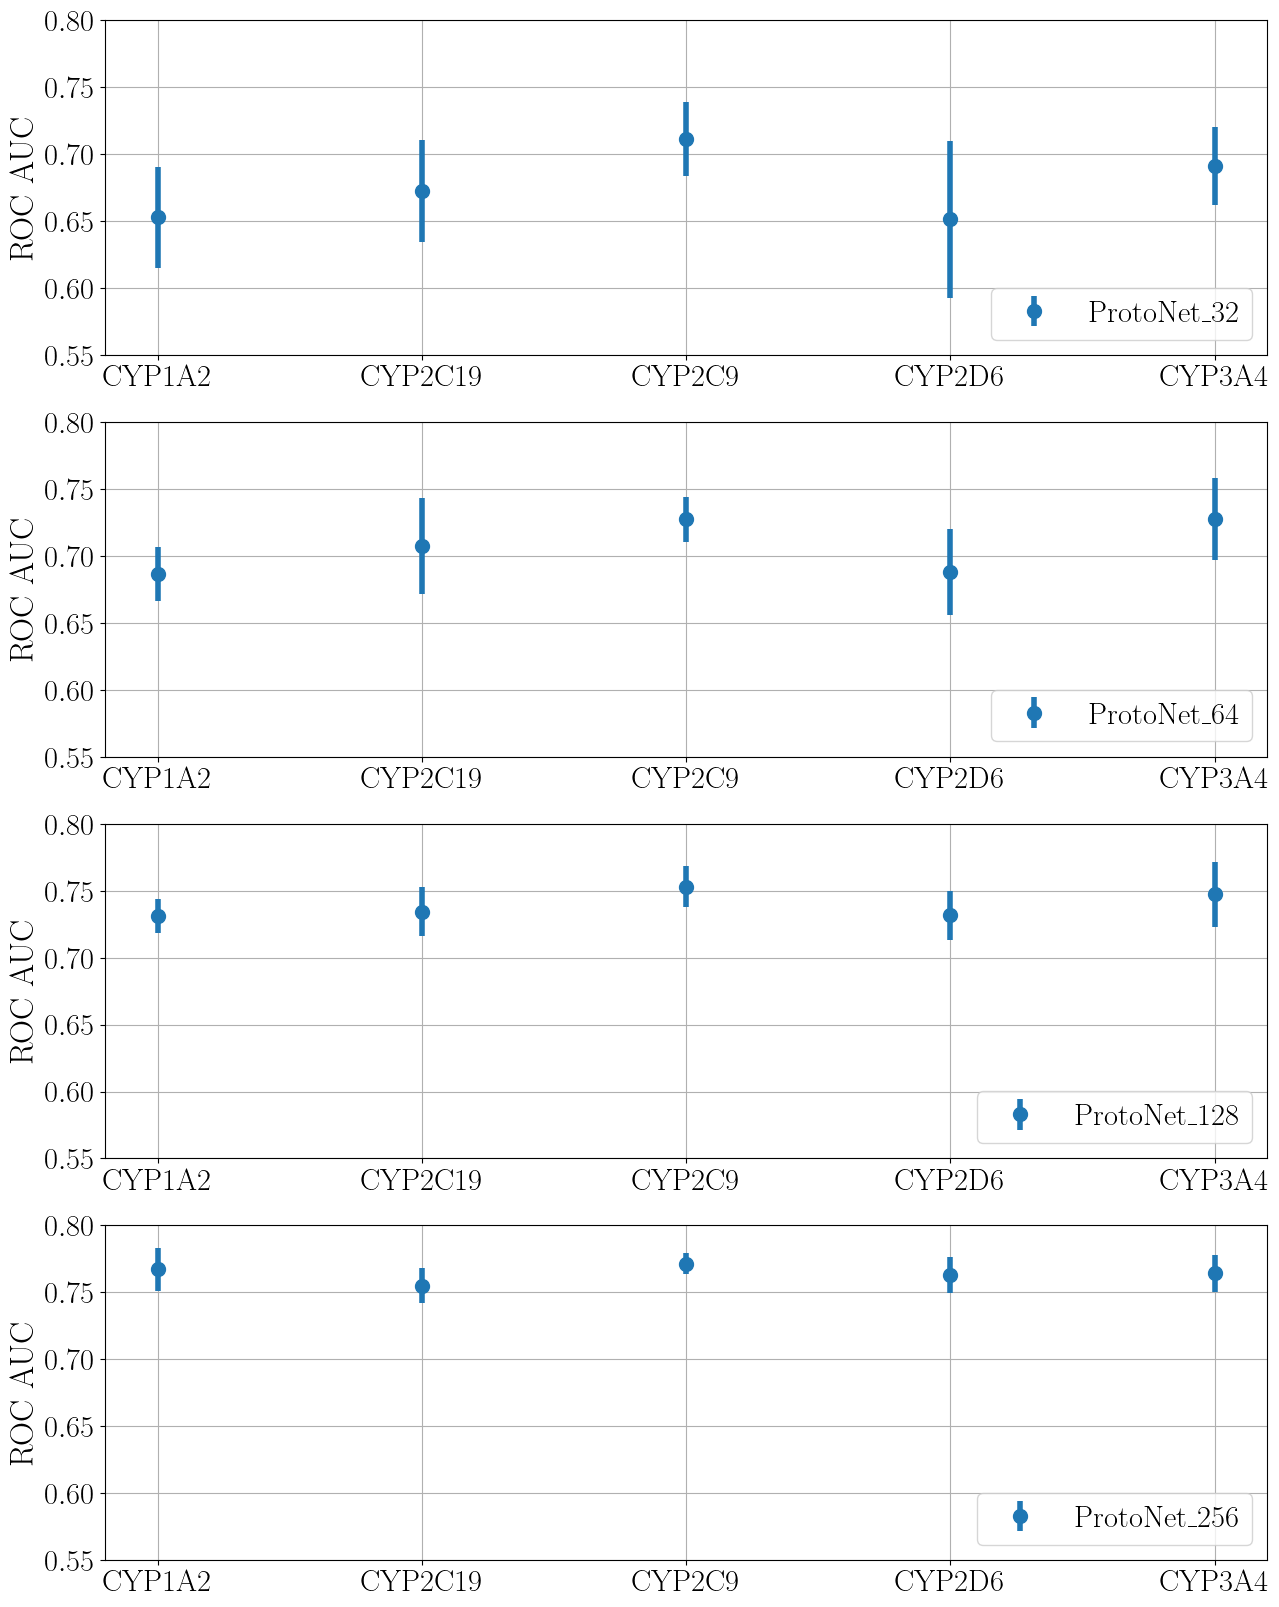

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 1, figsize=(15, 20))

ProtoNet_16 = pd.read_csv(model_summaries_ProtoNet['ProtoNet_16'])
ProtoNet_16_similar = pd.read_csv(model_summaries_ProtoNet_similar['ProtoNet_16'])
ProtoNet_16_dissimilar = pd.read_csv(model_summaries_ProtoNet_dissimilar['ProtoNet_16'])

ProtoNet_32 = pd.read_csv(model_summaries_ProtoNet['ProtoNet_32'])
ProtoNet_64 = pd.read_csv(model_summaries_ProtoNet['ProtoNet_64'])
ProtoNet_128 = pd.read_csv(model_summaries_ProtoNet['ProtoNet_128'])
ProtoNet_256 = pd.read_csv(model_summaries_ProtoNet['ProtoNet_256'])
ProtoNet_256_similar = pd.read_csv(model_summaries_ProtoNet_similar['ProtoNet_256'])
ProtoNet_256_dissimilar = pd.read_csv(model_summaries_ProtoNet_dissimilar['ProtoNet_256'])


ProtoNet_16['task_id'] = labels
ProtoNet_16_similar['task_id'] = labels
ProtoNet_16_dissimilar['task_id'] = labels
ProtoNet_32['task_id'] = labels
ProtoNet_64['task_id'] = labels
ProtoNet_128['task_id'] = labels
ProtoNet_256['task_id'] = labels
ProtoNet_256_similar['task_id'] = labels
ProtoNet_256_dissimilar['task_id'] = labels

'''
ax[0].errorbar(ProtoNet_16['task_id'], ProtoNet_16['roc_auc'], ProtoNet_16['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_16', linewidth=4, markersize=10)
ax[0].legend(loc='lower right')
ax[0].grid()
ax[0].set_ylabel('ROC AUC')
'''

ax[0].errorbar(ProtoNet_32['task_id'], ProtoNet_32['roc_auc'], ProtoNet_32['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_32', linewidth=4, markersize=10)
ax[0].legend(loc='lower right')
ax[0].grid()
ax[0].set_ylabel('ROC AUC')

ax[1].errorbar(ProtoNet_64['task_id'], ProtoNet_64['roc_auc'], ProtoNet_64['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_64', linewidth=4, markersize=10)
ax[1].legend(loc='lower right')
ax[1].grid()
ax[1].set_ylabel('ROC AUC')

ax[2].errorbar(ProtoNet_128['task_id'], ProtoNet_128['roc_auc'], ProtoNet_128['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_128', linewidth=4, markersize=10)
ax[2].legend(loc='lower right')
ax[2].grid()
ax[2].set_ylabel('ROC AUC')


ax[3].errorbar(ProtoNet_256['task_id'], ProtoNet_256['roc_auc'], ProtoNet_256['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_256', linewidth=4, markersize=10)
ax[3].legend(loc='lower right')
ax[3].grid()
ax[3].set_ylabel('ROC AUC')


[ax[i].set(ylim=(0.55, 0.8)) for i in range(4)]


/tmp/ipykernel_96115/863547299.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0].errorbar(ProtoNet_32['task_id'], ProtoNet_32['acc'], ProtoNet_32['acc_std'], linestyle='None', fmt='-o',label='ProtoNet_32', linewidth=4, markersize=10)
/tmp/ipykernel_96115/863547299.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[1].errorbar(ProtoNet_64['task_id'], ProtoNet_64['acc'], ProtoNet_64['acc_std'], linestyle='None', fmt='-o',label='ProtoNet_64', linewidth=4, markersize=10)
/tmp/ipykernel_96115/863547299.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax[2].errorbar(ProtoNet_128['task_id'], ProtoNet_128['a

[[(0.55, 0.8)], [(0.55, 0.8)], [(0.55, 0.8)], [(0.55, 0.8)]]

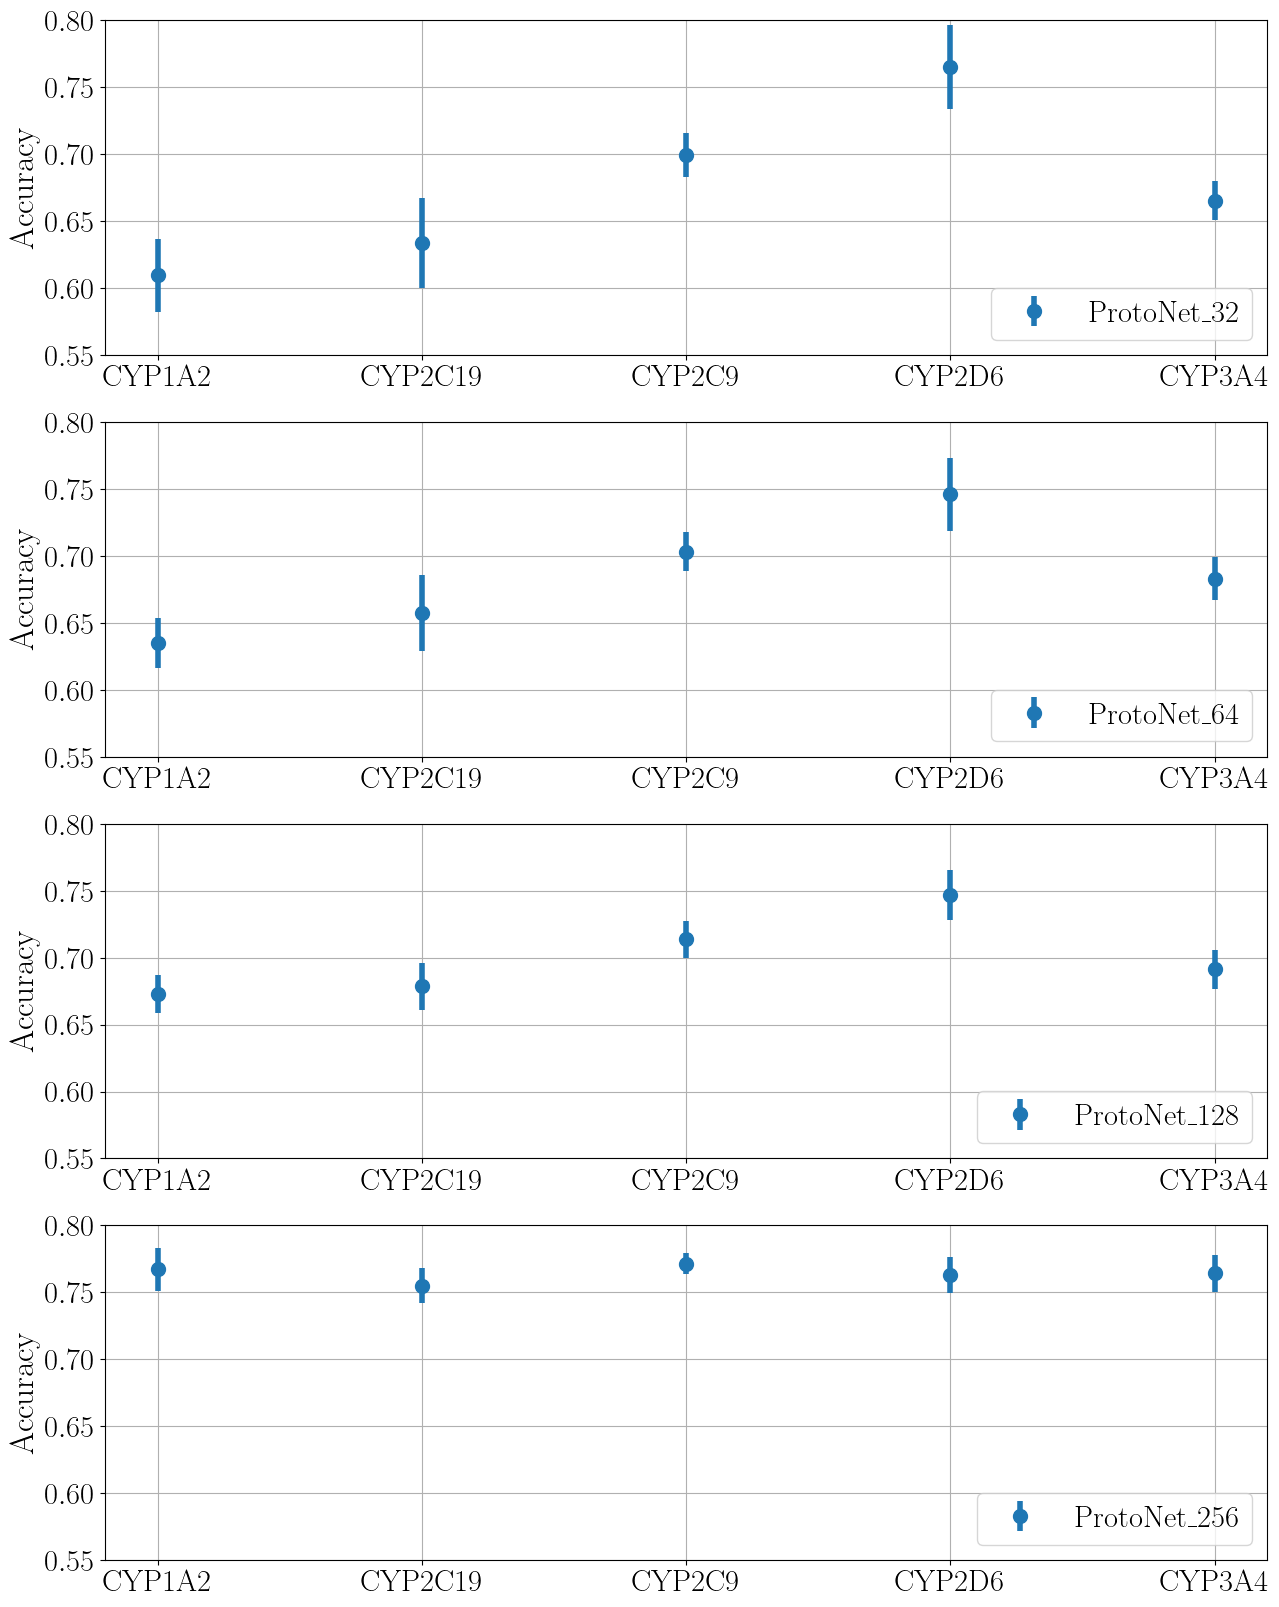

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 1, figsize=(15, 20))
'''
ax[0].errorbar(ProtoNet_16['task_id'], ProtoNet_16['acc'], ProtoNet_16['acc_std'], linestyle='None', fmt='-o',label='ProtoNet_16', linewidth=4, markersize=10)
ax[0].legend(loc='lower right')
ax[0].grid()
ax[0].set_ylabel('Accuracy')
'''

ax[0].errorbar(ProtoNet_32['task_id'], ProtoNet_32['acc'], ProtoNet_32['acc_std'], linestyle='None', fmt='-o',label='ProtoNet_32', linewidth=4, markersize=10)
ax[0].legend(loc='lower right')
ax[0].grid()
ax[0].set_ylabel('Accuracy')

ax[1].errorbar(ProtoNet_64['task_id'], ProtoNet_64['acc'], ProtoNet_64['acc_std'], linestyle='None', fmt='-o',label='ProtoNet_64', linewidth=4, markersize=10)
ax[1].legend(loc='lower right')
ax[1].grid()
ax[1].set_ylabel('Accuracy')

ax[2].errorbar(ProtoNet_128['task_id'], ProtoNet_128['acc'], ProtoNet_128['acc_std'], linestyle='None', fmt='-o',label='ProtoNet_128', linewidth=4, markersize=10)
ax[2].legend(loc='lower right')
ax[2].grid()
ax[2].set_ylabel('Accuracy')


ax[3].errorbar(ProtoNet_256['task_id'], ProtoNet_256['roc_auc'], ProtoNet_256['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_256', linewidth=4, markersize=10)
ax[3].legend(loc='lower right')
ax[3].grid()
ax[3].set_ylabel('Accuracy')


[ax[i].set(ylim=(0.55, 0.8)) for i in range(4)]

Text(0, 0.5, 'ROC AUC')

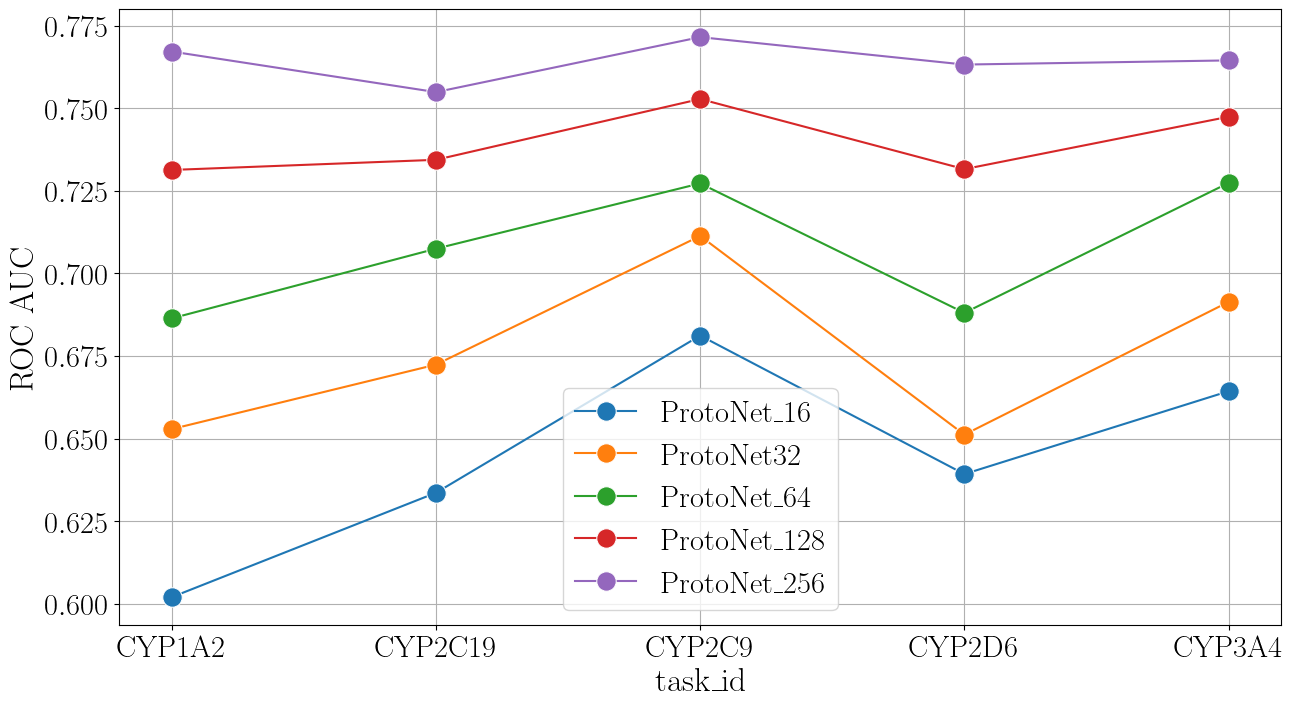

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(ProtoNet_16, x= 'task_id', y='roc_auc', label= 'ProtoNet_16', marker="o", markersize=14, ax=ax)
sns.lineplot(ProtoNet_32, x= 'task_id', y='roc_auc', label= 'ProtoNet32', marker="o", markersize=14, ax=ax)
sns.lineplot(ProtoNet_64, x= 'task_id', y='roc_auc', label= 'ProtoNet_64', marker="o", markersize=14, ax=ax)
sns.lineplot(ProtoNet_128, x= 'task_id', y='roc_auc', label= 'ProtoNet_128', marker="o", markersize=14, ax=ax)
sns.lineplot(ProtoNet_256, x= 'task_id', y='roc_auc', label= 'ProtoNet_256', marker="o", markersize=14, ax=ax)

ax.legend()
ax.grid()
ax.set_ylabel('ROC AUC')

[(0.55, 0.8)]

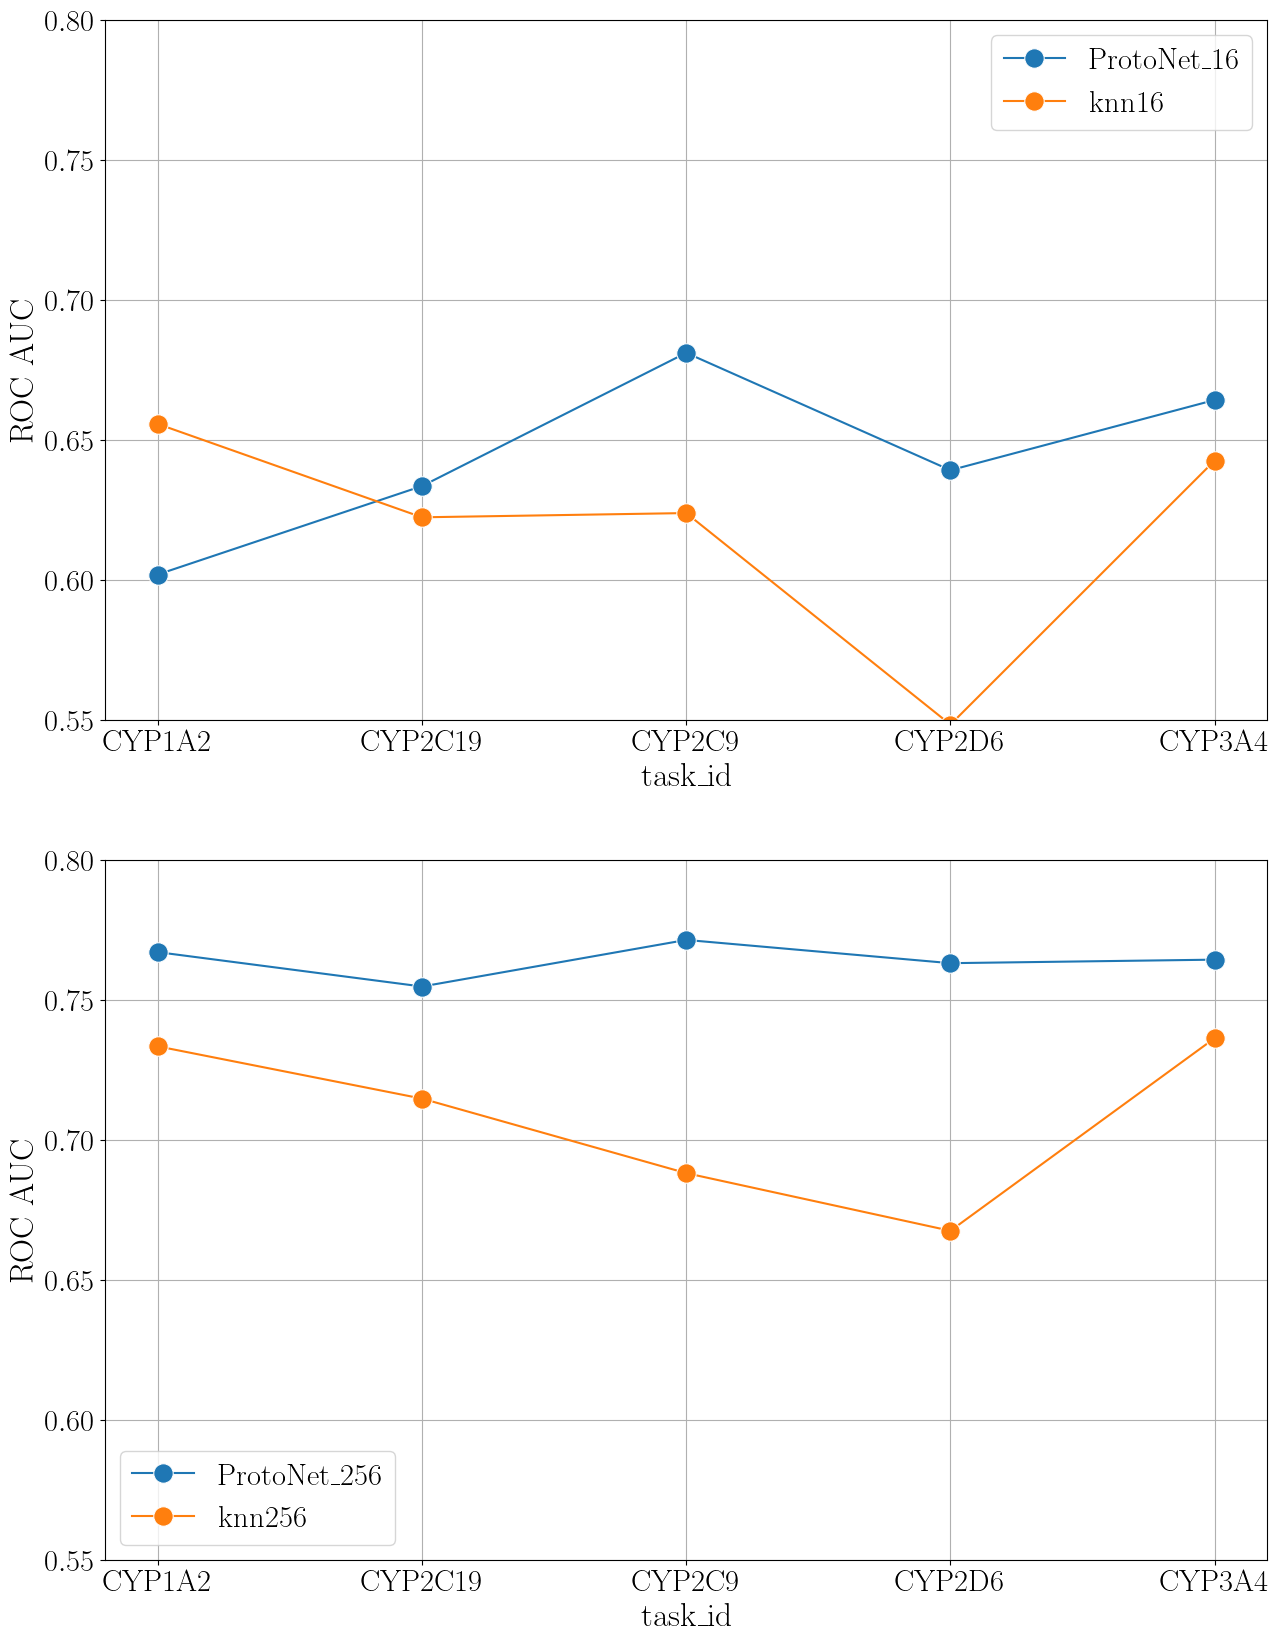

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))

sns.lineplot(ProtoNet_16, x= 'task_id', y='roc_auc', label= 'ProtoNet_16', marker="o", markersize=14, ax=ax[0])
sns.lineplot(knn_16, x= 'task_id', y='roc_auc', label= 'knn16', marker="o", markersize=14, ax=ax[0])

sns.lineplot(ProtoNet_256, x= 'task_id', y='roc_auc', label= 'ProtoNet_256', marker="o", markersize=14, ax=ax[1])
sns.lineplot(knn_256, x= 'task_id', y='roc_auc', label= 'knn256', marker="o", markersize=14, ax=ax[1])

ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('ROC AUC')

ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('ROC AUC')

ax[0].set(ylim=(0.55, 0.8))
ax[1].set(ylim=(0.55, 0.8))

/tmp/ipykernel_96115/682447456.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(ProtoNet_256['task_id'], ProtoNet_256['roc_auc'], ProtoNet_256['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_256', linewidth=4, markersize=10)
/tmp/ipykernel_96115/682447456.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(knn_256['task_id'], knn_256['roc_auc'], knn_256['roc_auc_std'], linestyle='None', fmt='-o',label='kNN_256', linewidth=4, markersize=10)


[(0.6, 0.8)]

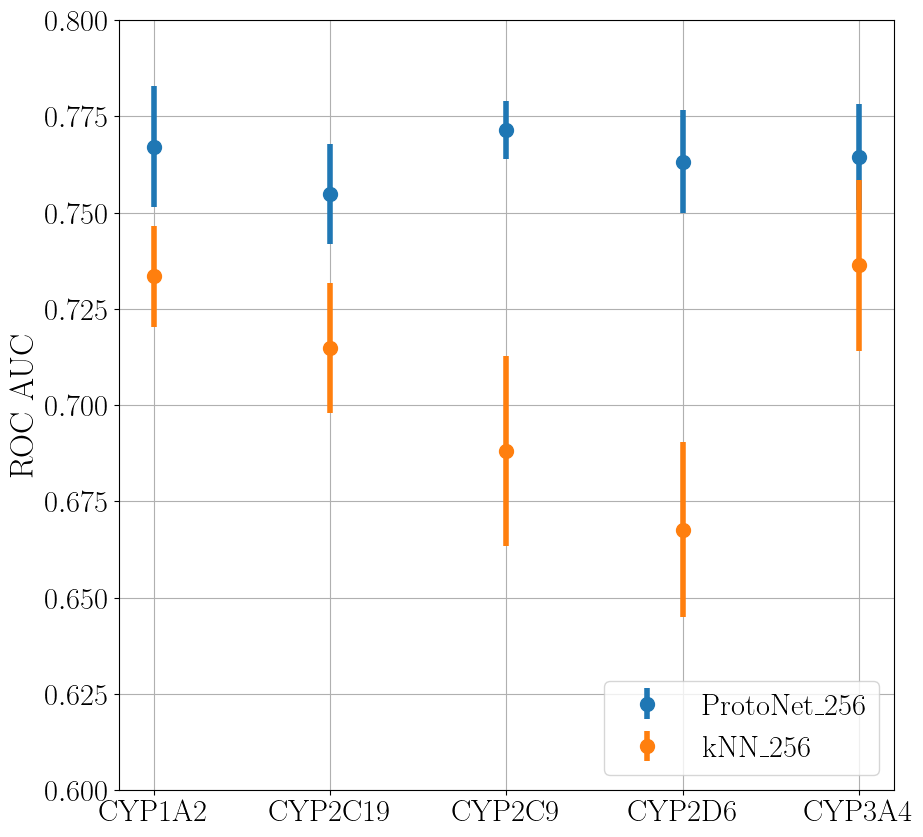

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(ProtoNet_256['task_id'], ProtoNet_256['roc_auc'], ProtoNet_256['roc_auc_std'], linestyle='None', fmt='-o',label='ProtoNet_256', linewidth=4, markersize=10)
ax.legend(loc='lower right')
ax.grid()
ax.set_ylabel('ROC AUC')

ax.errorbar(knn_256['task_id'], knn_256['roc_auc'], knn_256['roc_auc_std'], linestyle='None', fmt='-o',label='kNN_256', linewidth=4, markersize=10)
ax.legend(loc='lower right')

ax.set(ylim=(0.6, 0.8))


[[(0.5, 0.9)], [(0.5, 0.9)], [(0.5, 0.9)]]

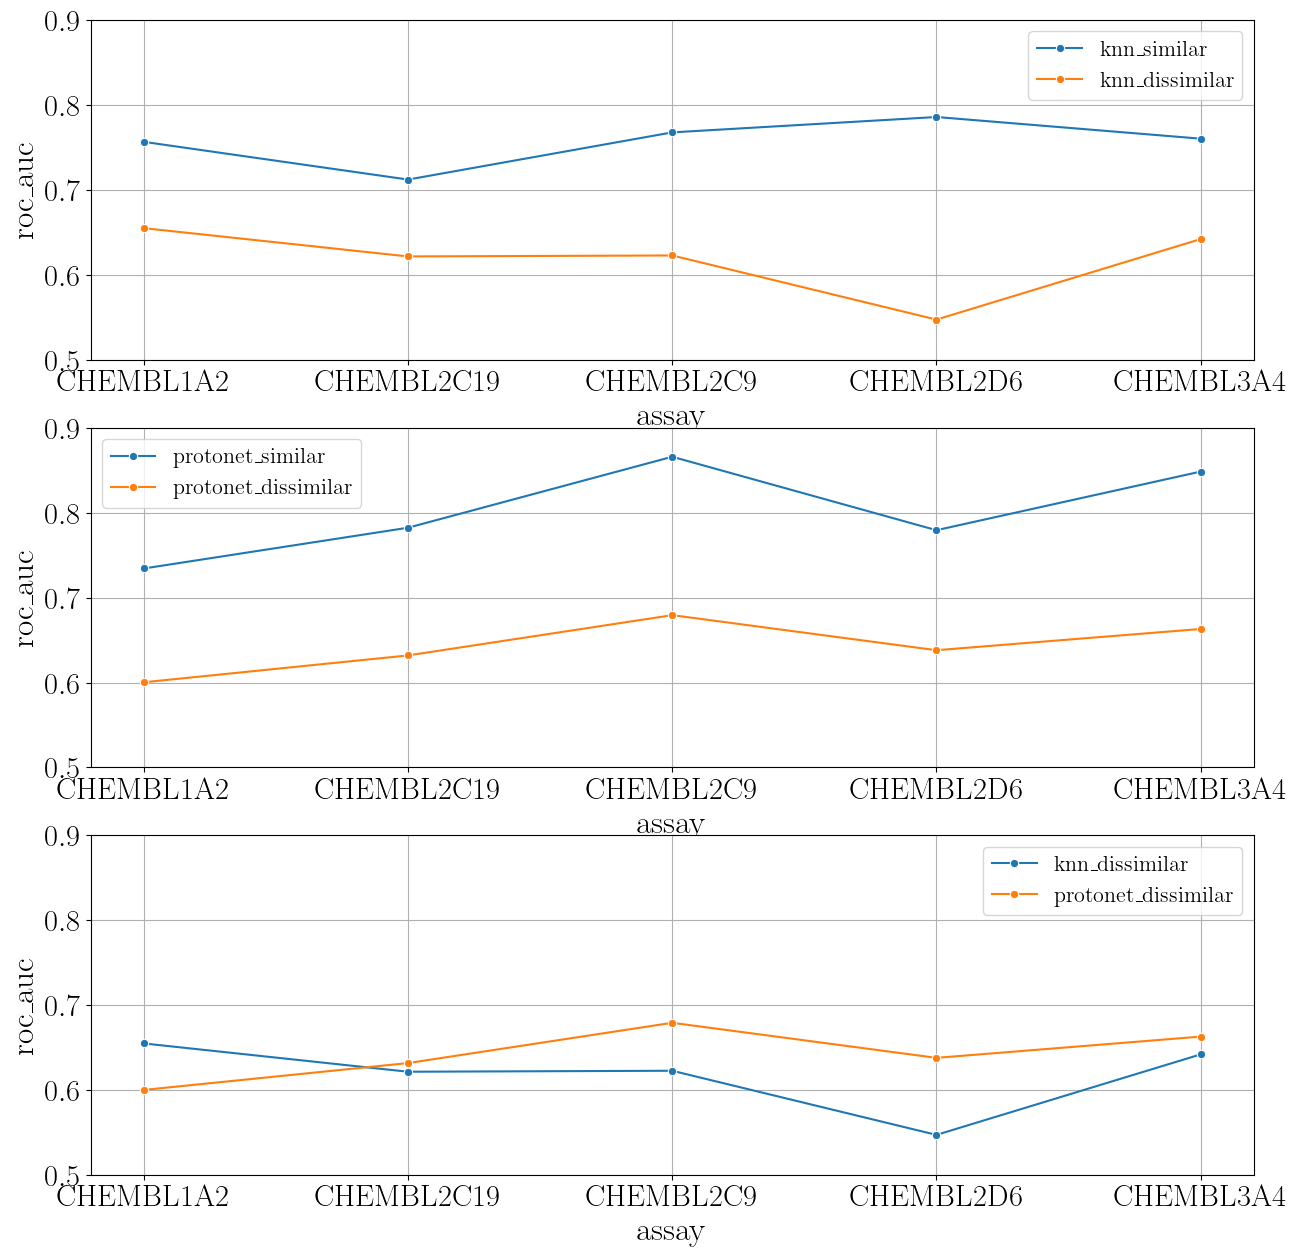

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
plt.rc("legend", fontsize=16)  # fontsize of the legend


sns.lineplot(knn_16_similar, x= 'assay', y='roc_auc', label= 'knn_similar', marker="o", ax = ax[0])
sns.lineplot(knn_16_dissimilar, x= 'assay', y='roc_auc', label= 'knn_dissimilar', marker="o", ax = ax[0])
ax[0].legend()
ax[0].grid()

sns.lineplot(ProtoNet_16_similar, x= 'assay', y='roc_auc', label= 'protonet_similar', marker="o", ax = ax[1])
sns.lineplot(ProtoNet_16_dissimilar, x= 'assay', y='roc_auc', label= 'protonet_dissimilar', marker="o", ax = ax[1])
ax[1].legend()
ax[1].grid()


sns.lineplot(knn_16_dissimilar, x= 'assay', y='roc_auc', label= 'knn_dissimilar', marker="o", ax = ax[2])
sns.lineplot(ProtoNet_16_dissimilar, x= 'assay', y='roc_auc', label= 'protonet_dissimilar', marker="o", ax = ax[2])
ax[2].legend()
ax[2].grid()

[ax[i].set(ylim=(0.5, 0.9)) for i in range(3)]

[[(0.55, 0.9)], [(0.55, 0.9)], [(0.55, 0.9)]]

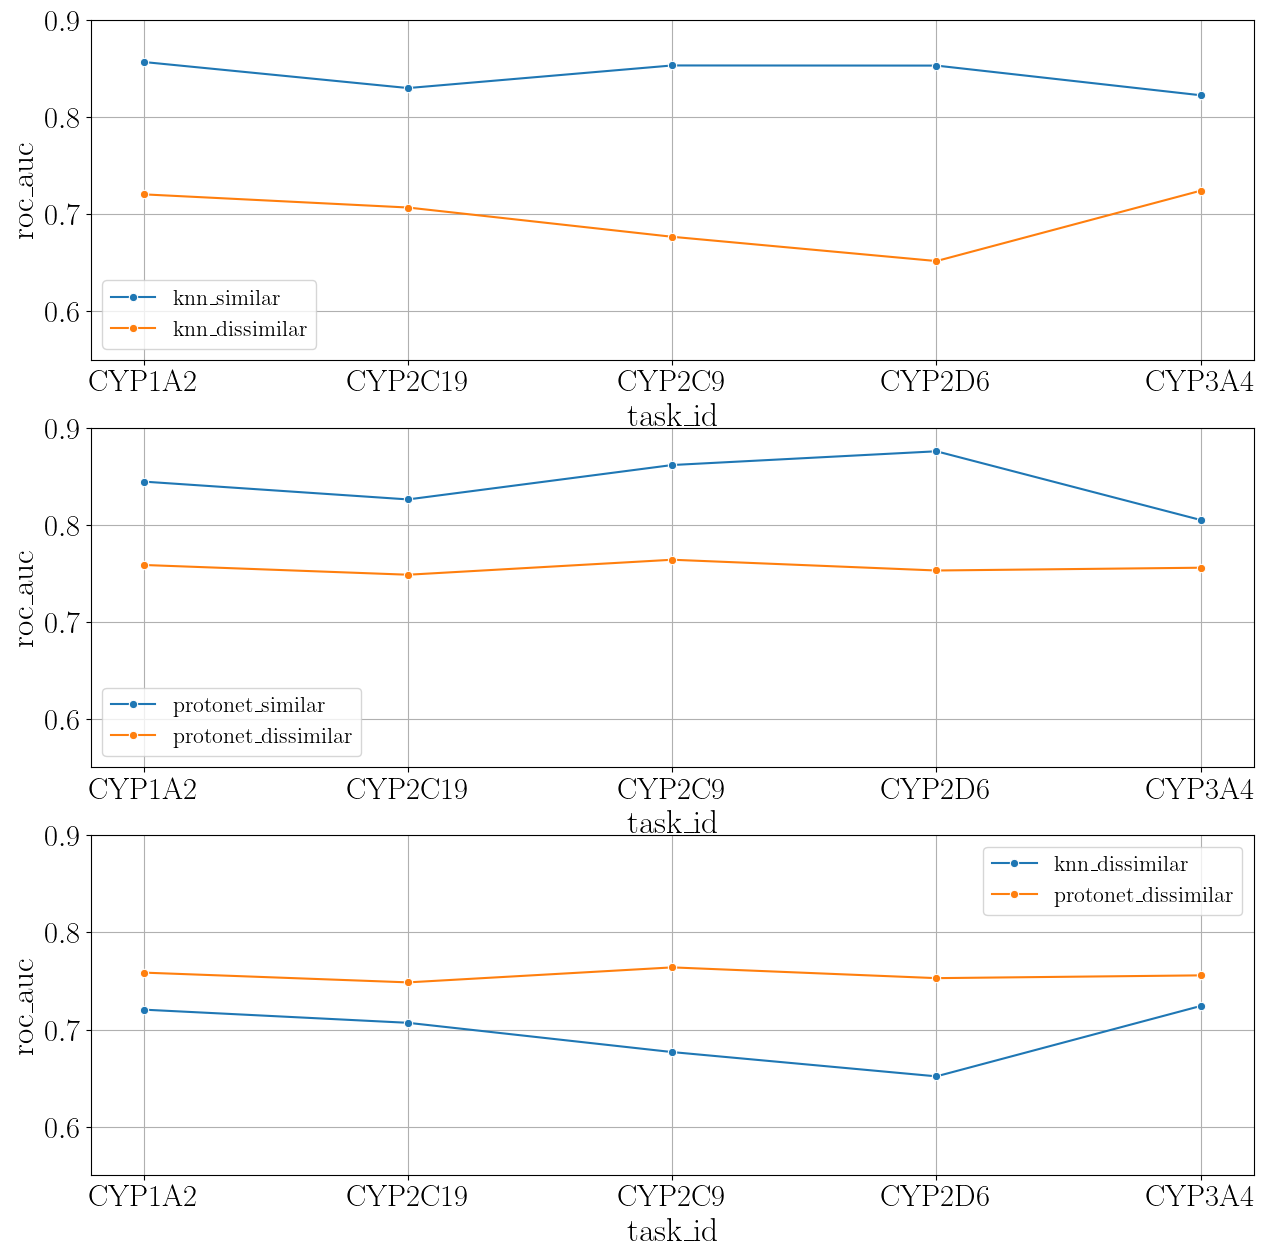

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
plt.rc("legend", fontsize=16)  # fontsize of the legend


sns.lineplot(knn_256_similar, x= 'task_id', y='roc_auc', label= 'knn_similar', marker="o", ax = ax[0])
sns.lineplot(knn_256_dissimilar, x= 'task_id', y='roc_auc', label= 'knn_dissimilar', marker="o", ax = ax[0])
ax[0].legend()
ax[0].grid()

sns.lineplot(ProtoNet_256_similar, x= 'task_id', y='roc_auc', label= 'protonet_similar', marker="o", ax = ax[1])
sns.lineplot(ProtoNet_256_dissimilar, x= 'task_id', y='roc_auc', label= 'protonet_dissimilar', marker="o", ax = ax[1])
ax[1].legend()
ax[1].grid()


sns.lineplot(knn_256_dissimilar, x= 'task_id', y='roc_auc', label= 'knn_dissimilar', marker="o", ax = ax[2])
sns.lineplot(ProtoNet_256_dissimilar, x= 'task_id', y='roc_auc', label= 'protonet_dissimilar', marker="o", ax = ax[2])
ax[2].legend()
ax[2].grid()

[ax[i].set(ylim=(0.55, 0.9)) for i in range(3)]